In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5')
pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

import logging
rootLogger = logging.getLogger()

dmag regressor trained, R2=0.978788929733
qR regressor trained, R2=0.96215973315


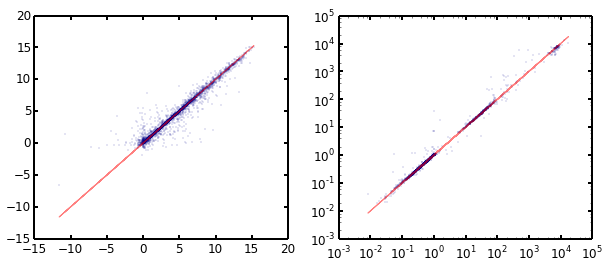

In [2]:
%matplotlib inline
rootLogger.setLevel(logging.INFO)
pop._train_pipelines(n_jobs=8, plot=True)
rootLogger.setLevel(logging.DEBUG)

In [11]:
rootLogger.setLevel(logging.INFO)

In [15]:
%timeit pop._define_stars()

10 loops, best of 3: 115 ms per loop


In [16]:
%timeit pop._generate_binaries()

1 loops, best of 3: 301 ms per loop


In [18]:
%timeit pop._generate_orbits()

10 loops, best of 3: 135 ms per loop


In [18]:
len(pop.d_pri)

34210

In [12]:
len(pop.stars)

34332

In [15]:
len(pop.stars['d_pri'].values)

34332

In [20]:
'd_pri' in pop._not_calculated

True

In [21]:
'd_pri' in pop.orbital_props

True

In [19]:
pop._not_calculated

['period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [21]:
pop.period

array([  1.94496999e+02,   1.41581623e+04,   2.73116490e+01, ...,
         4.04700099e+06,   2.66557261e+04,   2.19053093e+02])

In [8]:
pop._define_stars()

In [9]:
len(pop.tra)

DEBUG:root:Generating binary companions for 34275 stars...
DEBUG:root:Generating orbits for 34275 stars...
DEBUG:root:75 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:57 orbits assigned to ecc=0


ValueError: operands could not be broadcast together with shapes (33966,) (34275,) (33966,) 

In [15]:
len(pop.flux_ratio)

33815

In [10]:
pop.period

DEBUG:root:Generating orbits for 34275 stars...
DEBUG:root:64 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:45 orbits assigned to ecc=0


ValueError: operands could not be broadcast together with shapes (33966,) (34275,) (33966,) 

In [8]:
len(pop.period)

34338

In [10]:
len(pop.radius_B)

34338

In [11]:
pop._generate_binaries()

In [12]:
pop.period

array([  2.64314194e+02,   4.68885045e+00,   2.35436461e+02, ...,
         2.15864286e+06,   6.38365552e+03,   5.63384638e+05])

In [19]:
pop._define_stars()

In [20]:
pop.N

34579

In [21]:
len(pop.stars)

34579

In [26]:
len(pop.d_pri)

34338

In [28]:
'd_pri' in pop._not_calculated

True

In [29]:
len(pop._star_cache)

34579

In [30]:
len(pop._index)

34579

In [27]:
'd_pri' in pop.orbital_props

True

In [23]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [16]:
pop.period

ValueError: operands could not be broadcast together with shapes (34338,) (34579,) (34338,) 

In [7]:
%timeit pop._generate_binaries()

1 loops, best of 3: 295 ms per loop


In [8]:
%timeit pop._generate_orbits()

10 loops, best of 3: 82.5 ms per loop


In [9]:
%timeit pop._define_stars()

10 loops, best of 3: 120 ms per loop


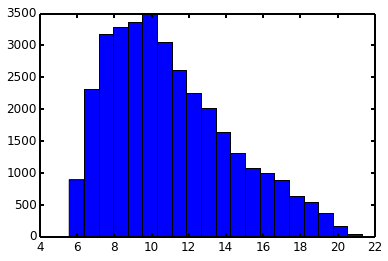

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(pop.b_target, bins=20);

In [14]:
len(pop.target_mag)

34182

In [16]:
len(pop.stars.target_mag)

34182

In [18]:
len(pop.stars.Kepler_mag)

34182

In [20]:
pop._generate_binaries()

In [23]:
pop.flux_ratio

array([ 0.        ,  0.57923069,  0.        , ...,  0.        ,
        0.        ,  0.54295226])

In [30]:
pop._define_stars()

In [31]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [32]:
pop.flux_ratio

array([ 0.83702842,  0.        ,  0.        , ...,  0.10005448,
        0.        ,  0.14975393])

In [33]:
pop._not_calculated

['period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [36]:
pop.period

array([ 11021.52537402,   1660.53071248,     17.18135333, ...,
         2838.88530808,   7222.03006546,   7857.89083491])

In [37]:
pop._define_stars()

In [39]:
pop.period

array([  1.56755125e+04,   2.49027838e+02,   3.02022528e+00, ...,
         2.52893195e+06,   4.43991881e+01,   2.79233964e+02])

In [40]:
len(pop.stars)

34441

In [41]:
pop._define_stars()
len(pop.stars)

34352

In [42]:
len(pop.dilution_factor)

34352

In [43]:
len(pop.d_pri)

34161

In [44]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']